In [1]:
import numpy as np
import librosa
import pandas as pd
import IPython.display as Audio
import matplotlib.pyplot as plt

## 1)A1. Use numpy.fft.fft() to transform the speech signal to its spectral domain. Please plot the amplitude part of the spectral components and observe it.

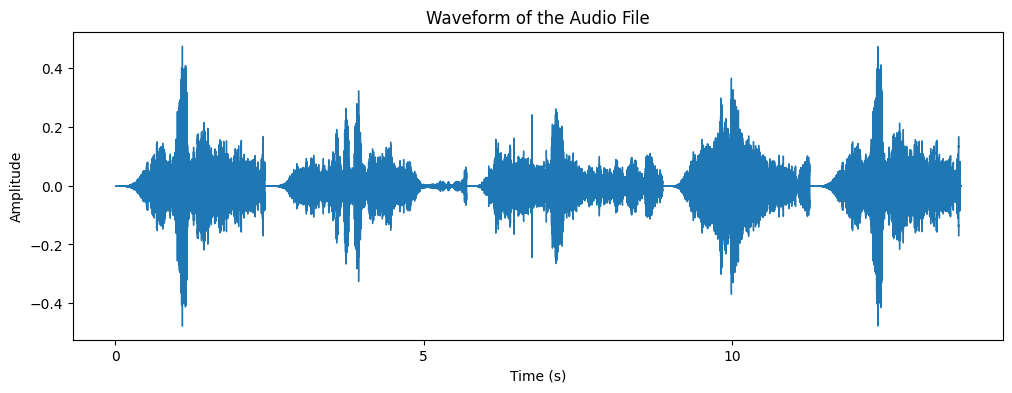

In [2]:
y,sr = librosa.load(r"/content/vinod.rec.wav")
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y,sr=sr)
plt.title("Waveform of the Audio File")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

In [3]:
np.fft.fft(y,sr)

array([-2.52800346+0.j        , -1.99988185-0.27987136j,
       -1.60957692+0.02212163j, ..., -2.21862638-0.25071053j,
       -1.60957692-0.02212163j, -1.99988185+0.27987136j])

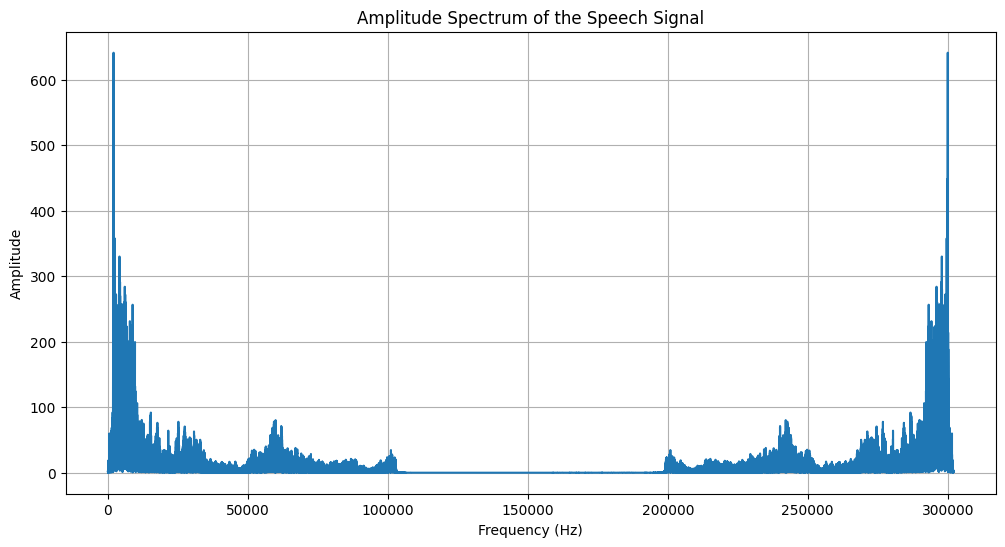

In [4]:
import numpy as np
import matplotlib.pyplot as plt
y_fft = np.fft.fft(y)

amplitude_spectrum = np.abs(y_fft)
plt.figure(figsize=(12, 6))
plt.plot(amplitude_spectrum)
plt.title("Amplitude Spectrum of the Speech Signal")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


## A2) Use numpy.fft.ifft() to inverse transform the frequency spectrum of the speech signal from frequency domain to time domain. Compare the generated time domain signal with the original signal

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


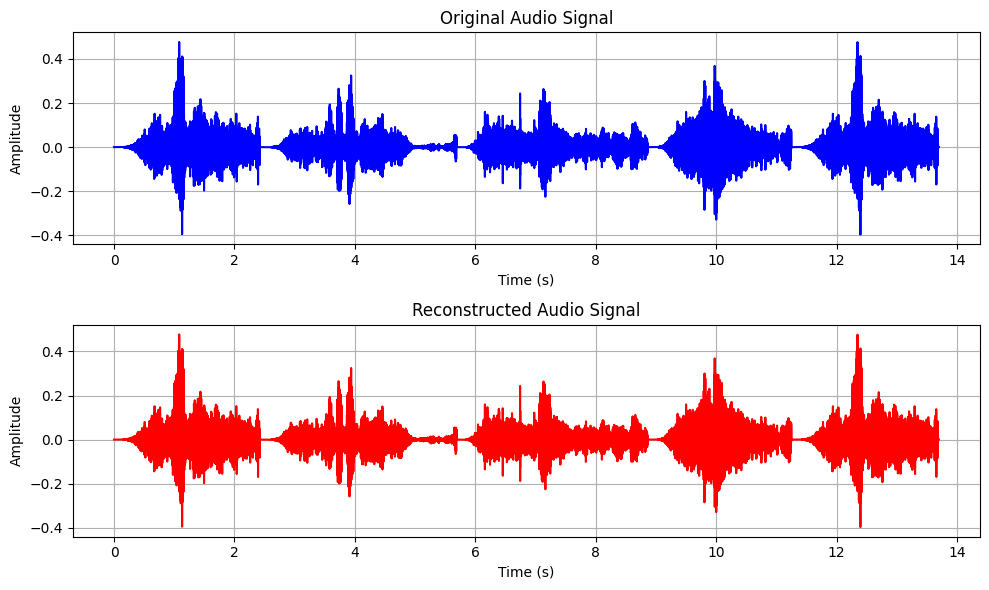

In [5]:
import numpy as np
import matplotlib.pyplot as plt

N = len(y)
fft_result = np.fft.fft(y)

reconstructed_signal = np.fft.ifft(fft_result)

plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(np.arange(N) / sr, y, color='b', label='Original Signal')
plt.title("Original Audio Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(np.arange(N) / sr, reconstructed_signal, color='r', label='Reconstructed Signal')
plt.title("Reconstructed Audio Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.grid()

plt.tight_layout()
plt.show()


## A3) Perform the spectral analysis of a word present in the recorded speech. Compare the spectrum with the spectrum of the full signal

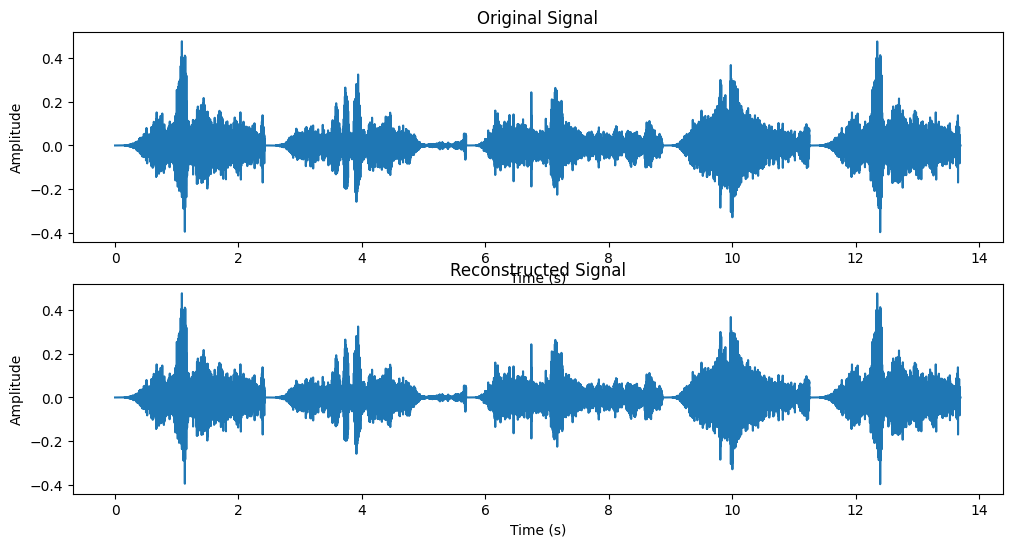

In [6]:

import numpy as np
import matplotlib.pyplot as plt

y_inverse = np.fft.ifft(y_fft)

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(np.arange(len(y))/sr, y)
plt.title('Original Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(np.arange(len(y_inverse))/sr, y_inverse)
plt.title('Reconstructed Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()


## A4) Take a rectangular window of 20 mili-second sampled at 22.5 KHz. Using FFT, analyse the spectral components

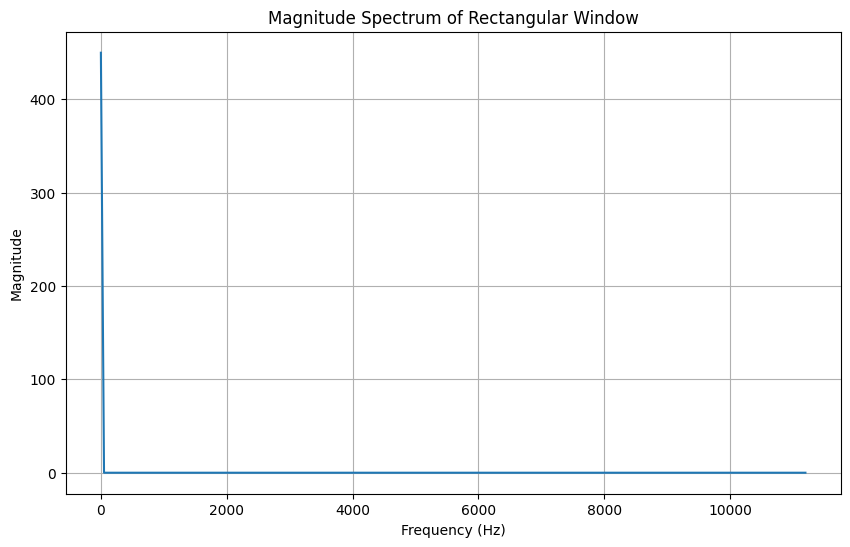

In [7]:

import numpy as np
import matplotlib.pyplot as plt

window_duration = 0.02
sampling_rate = 22500
window_size = int(window_duration * sampling_rate)

rectangular_window = np.ones(window_size)

fft_result = np.fft.fft(rectangular_window)

frequency_axis = np.fft.fftfreq(window_size, 1/sampling_rate)

plt.figure(figsize=(10, 6))
plt.plot(frequency_axis[:window_size//2], np.abs(fft_result[:window_size//2]))
plt.title("Magnitude Spectrum of Rectangular Window")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()


## A5)  Break your speech signal into window lengths of 20 mSec intervals. Evaluate the frequency components using numpy.fft.rfft(). Stack these frequency components as columns in a matrix. Use heatmap plot to display the matrix. You may use librosa.stft() or scipy.signal.stft() as well to achieve this

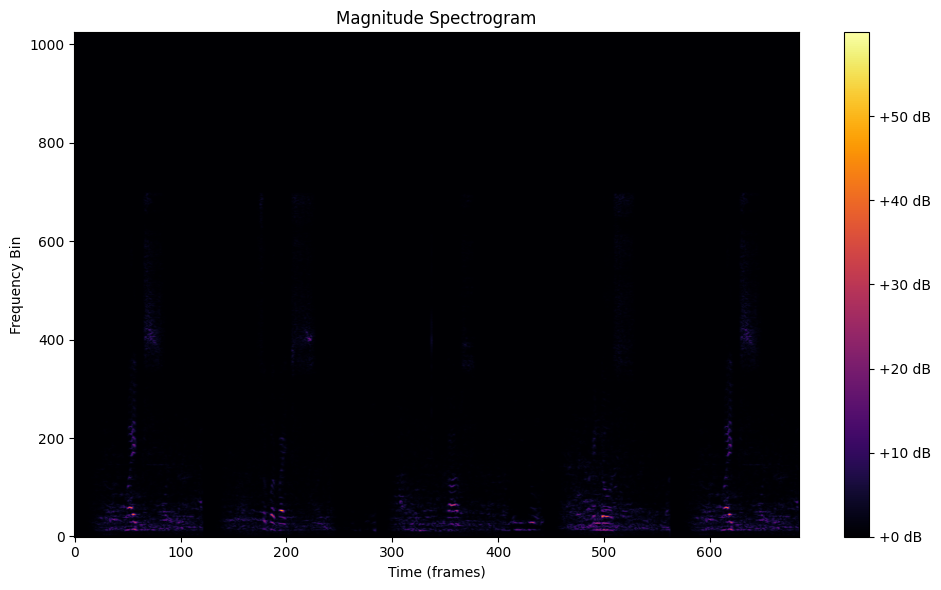

In [8]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
y, sr = librosa.load(r"/content/vinod.rec.wav")

window_length = 0.02
hop_length = int(window_length * sr)

D = librosa.stft(y, n_fft=2048, hop_length=hop_length)

magnitude = np.abs(D)

plt.figure(figsize=(10, 6))
plt.imshow(magnitude, aspect='auto', origin='lower', cmap='inferno')
plt.colorbar(format='%+2.0f dB')
plt.title('Magnitude Spectrogram')
plt.xlabel('Time (frames)')
plt.ylabel('Frequency Bin')
plt.tight_layout()
plt.show()


## A6) Use scipy.signal.spectrogram() to plot the spectrogram of the speech signal at the same duration. Compare the plots

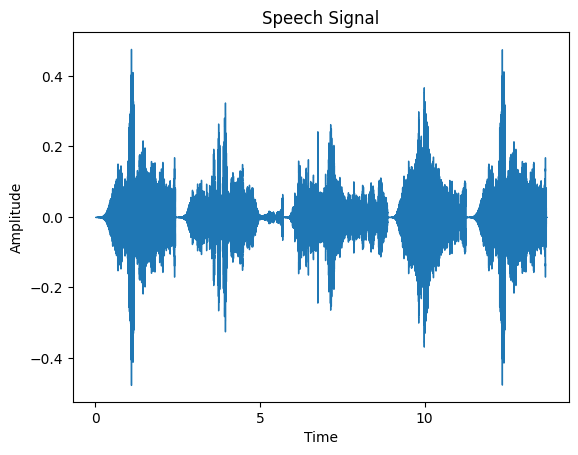

<ipython-input-9-b201d0554c0f>:10: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(t, f, 10 * np.log10(Sxx))


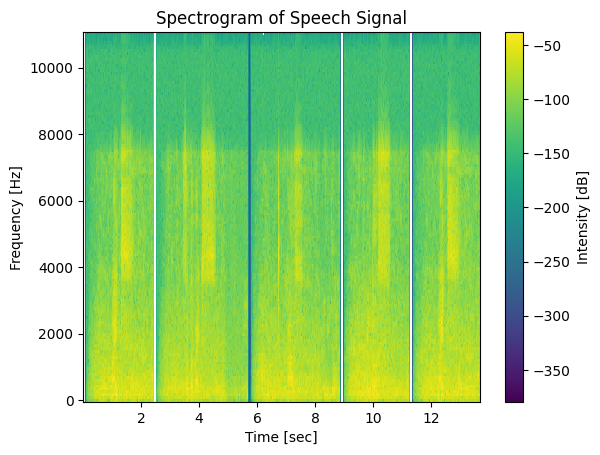

In [9]:
from scipy.signal import spectrogram

librosa.display.waveshow(y)
plt.title('Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

f, t, Sxx = spectrogram(y, sr)
plt.pcolormesh(t, f, 10 * np.log10(Sxx))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram of Speech Signal')
plt.colorbar(label='Intensity [dB]')
plt.show()